**Vamos experimentar agora o algoritmo Decision Tree?**

In [122]:
!pip -q install yellowbrick

zsh:1: command not found: pip


In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

In [124]:
import pickle
with open('Titanic/Titanic.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

**Importando a biblioteca de ajuste de hiperparâmetros**

In [137]:
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical
from sklearn.tree import DecisionTreeClassifier

In [138]:
search_space_dt = {
    'criterion': Categorical(['gini', 'entropy']),
    'max_depth': Integer(2, 15),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20)
}

# 2. Configurar e executar a busca
modelo = BayesSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    search_spaces=search_space_dt,
    n_iter=30,  # Número de combinações a testar
    cv=10,
    n_jobs=-1,
    random_state=42,
    verbose=1
)



Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

,estimator,DecisionTreeC...ndom_state=42)
,search_spaces,"{'criterion': Categorical(c...), prior=None), 'max_depth': Integer(low=2...m='normalize'), 'min_samples_leaf': Integer(low=1...m='normalize'), 'min_samples_split': Integer(low=2...m='normalize')}"
,optimizer_kwargs,None
,n_iter,30
,scoring,None
,fit_params,None
,n_jobs,-1
,n_points,1
,iid,'deprecated'
,refit,True
,cv,10


In [139]:
modelo.fit(X_treino, y_treino)
print(modelo.best_params_)
print(modelo.best_score_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

**Agora precisamos rodar a árvore com os hiperparâmetros obtidos**

In [140]:
modelo= DecisionTreeClassifier(max_depth=10, criterion='gini', max_features=0.4)
modelo.fit(X_treino, y_treino)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,0.4
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None




> **Vamos testar o modelo?**



In [141]:

previsoes = modelo.predict(X_teste)

In [142]:
previsoes

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0])



> **Será se o modelo acertou?**



In [143]:
y_teste

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [144]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.8100558659217877

In [145]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[94, 11],
       [23, 51]])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8100558659217877

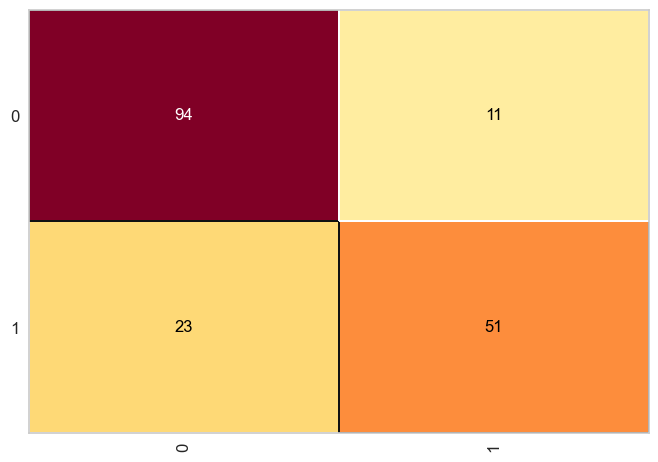

In [146]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [147]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



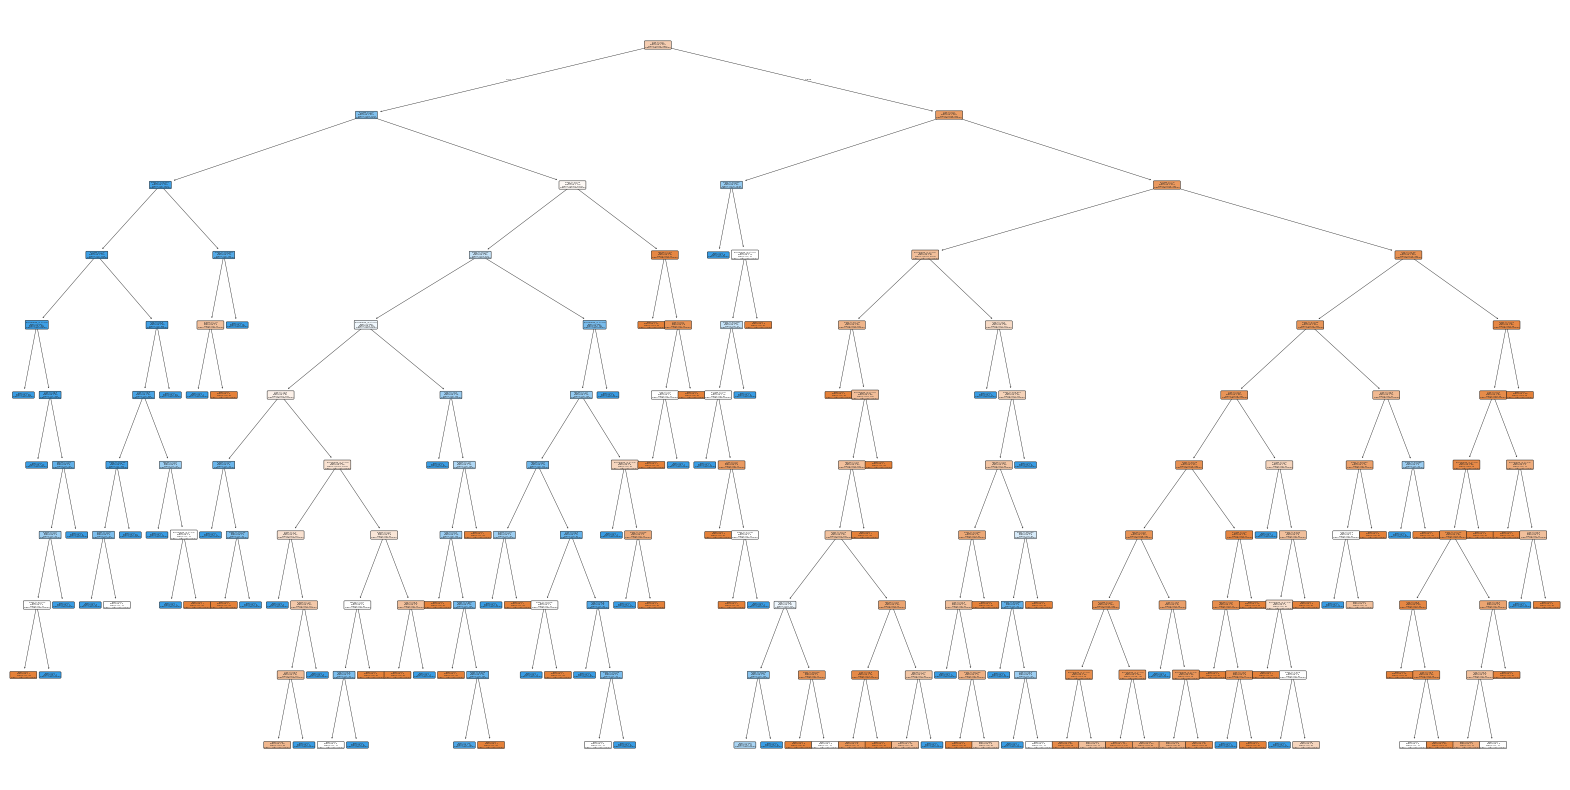

In [148]:
from sklearn import tree
import matplotlib.pyplot as plt

previsores_titanic = list(X_treino.columns) 

classes_titanic = ['Não Sobreviveu', 'Sobreviveu']

figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(20, 10)) 
tree.plot_tree(modelo, 
               feature_names=previsores_titanic, 
               class_names=classes_titanic,
               filled=True,
               rounded=True);